In [4]:
#Import Liberies

import pandas as pd
import numpy as np

from collections import Counter

#Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Import file

df = pd.read_csv(r"C:\Users\PC\Downloads\Customer-Churn - Customer-Churn.csv")

In [104]:
#check the first 5 rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


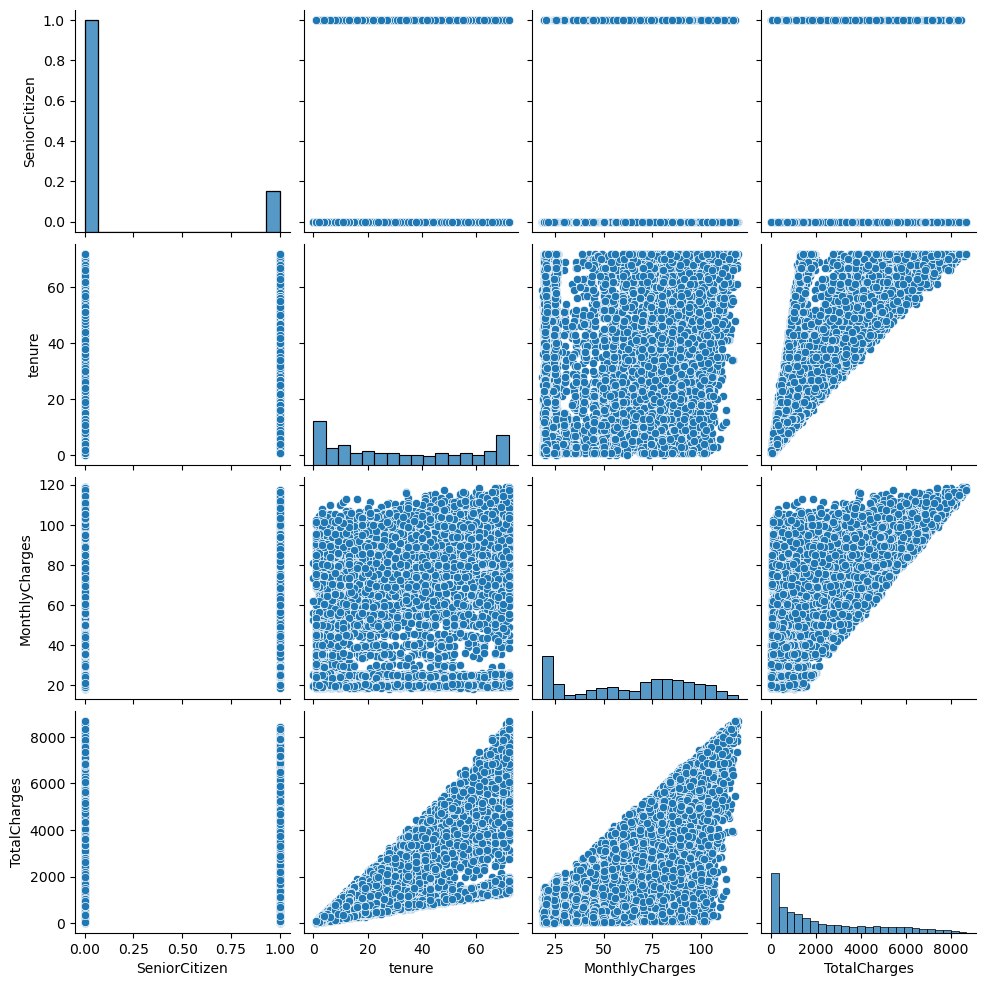

In [6]:
# Checking for correlation

sns.pairplot(df, size=2.5)
plt.show();

In [18]:
#Check For Missing Data

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
#Droping Missing values

df.dropna(inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# UNIVERIATE Analysis


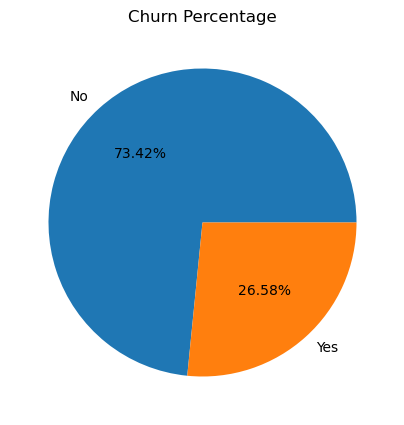

In [9]:
# Churn ratio by percentage

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Churn'])
plt.pie(count.values(),labels=count.keys(), autopct='%1.2f%%')
plt.title("Churn Percentage")
plt.show();

In [10]:
sns.set(style="whitegrid")

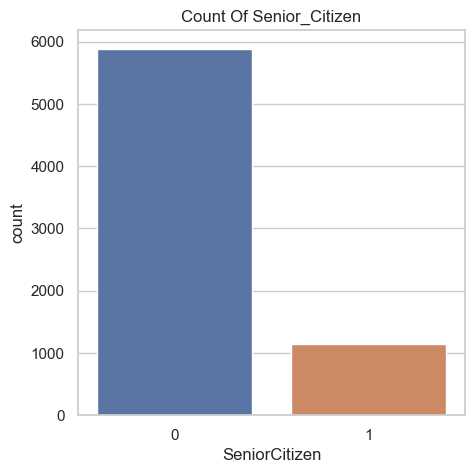

''

In [11]:
# Distribution of the Senior Citizen

plt.figure(figsize=(5,5))

sns.countplot(x='SeniorCitizen', data=df)
plt.title("Count Of Senior_Citizen")
plt.show()
;

### As the charts indicate we have fewer SeniorCitizen as customer

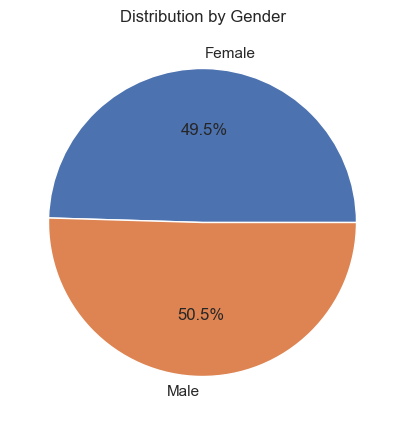

In [12]:
#Distribution By Gender

fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df['gender'])
ax.pie(count.values(),labels=count.keys(),autopct='%1.1f%%')
plt.title("Distribution by Gender")
plt.show();

### we can't really tell if there are more 'male' or 'female' cause the percentage difference is not that much so GENDER is not really affecting the churn rate

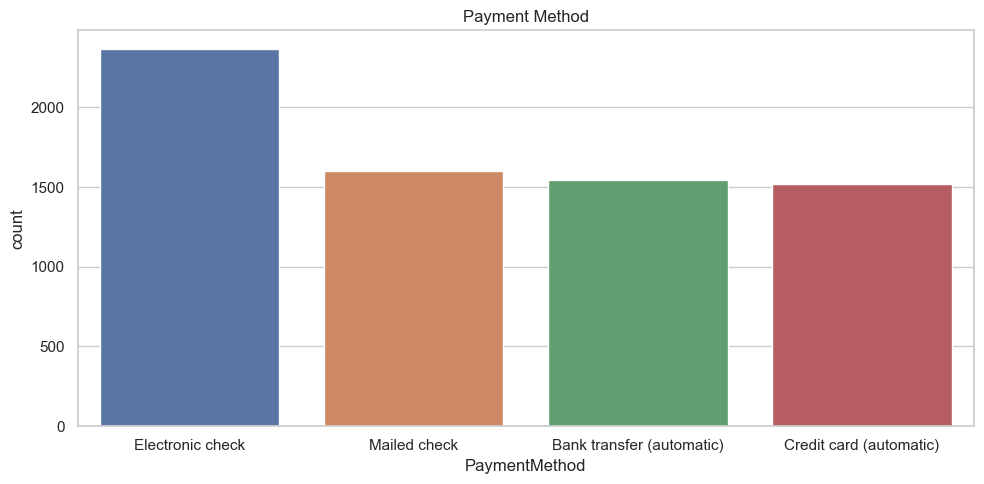

In [13]:
# Customer Distribution by Payment method

plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', data=df)
plt.title("Payment Method")
plt.tight_layout()
plt.show();

### According to the 'PAYMENT METHOD' Distribution we can see we have more customer paying with 'ELECTRONIC CHECK' and followed by 'MAIL CHECK', But there's not much difference in the rest of the 'payment method'.... which show Customer don't like the automated payment method

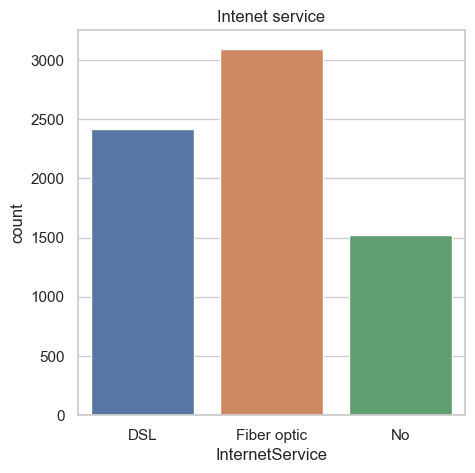

In [14]:
#Intenet Service Distribution

plt.figure(figsize=(5,5))
sns.countplot(x='InternetService', data=df)
plt.title("Intenet service")
plt.show();

### The intenet service shows that we have more customer opting in for the 'FIBER OPTIC INTENET SERVICE' and we have a very low ratio count of customer that did not opt for intenet service at all

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

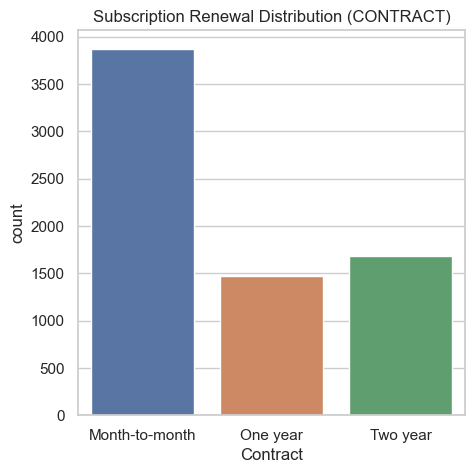

In [16]:
# Subscription Renewal Distribution

plt.figure(figsize=(5,5))
sns.countplot(x='Contract', data=df)
plt.title("Subscription Renewal Distribution (CONTRACT)")
plt.show();

### We have more existing customers opting for the 'month-to-month' subscription renewal more than the rest of the contracts method

# bivariate Analysis

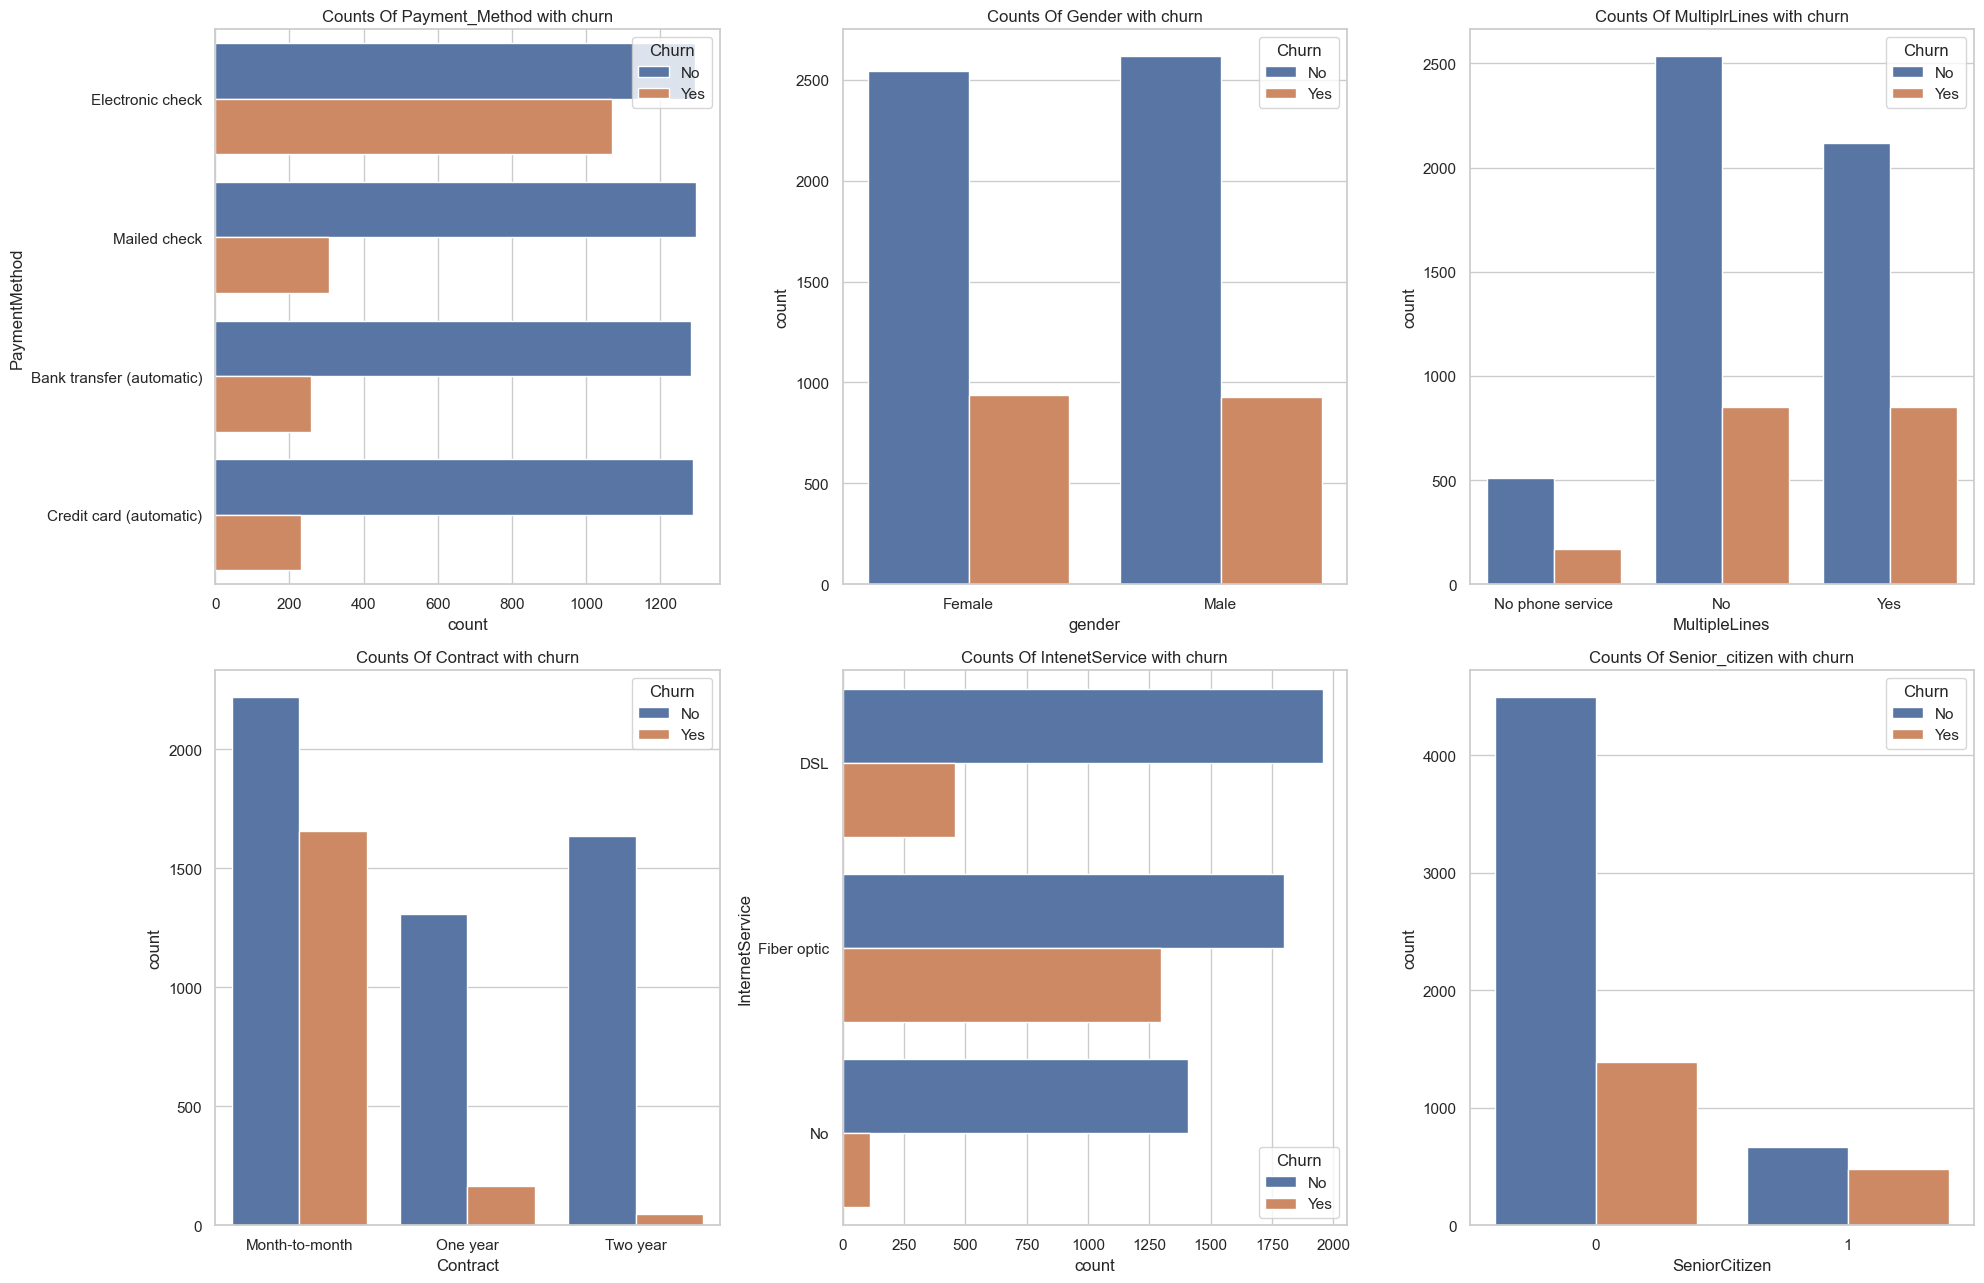

In [17]:
 #checkin the relationship between Churn and other features
    
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(20,13))

plt.title("Relationship Between CHURN and other FEATURES")

sns.countplot( data=df, x='gender', hue='Churn', ax=axs[0,1])
axs[0,1].set_title("Counts Of Gender with churn")

sns.countplot( data=df, y='PaymentMethod', hue='Churn', ax=axs[0,0])
axs[0,0].set_title("Counts Of Payment_Method with churn")

sns.countplot( data=df, x='Contract', hue='Churn', ax=axs[1,0])
axs[1,0].set_title("Counts Of Contract with churn")

sns.countplot( data=df, y='InternetService', hue='Churn', ax=axs[1,1])
axs[1,1].set_title("Counts Of IntenetService with churn")

sns.countplot( data=df, x='MultipleLines', hue='Churn', ax=axs[0,2])
axs[0,2].set_title("Counts Of MultiplrLines with churn")

sns.countplot( data=df, x='SeniorCitizen', hue='Churn', ax=axs[1,2])
axs[1,2].set_title("Counts Of Senior_citizen with churn")

plt.tight_layout()
plt.show();

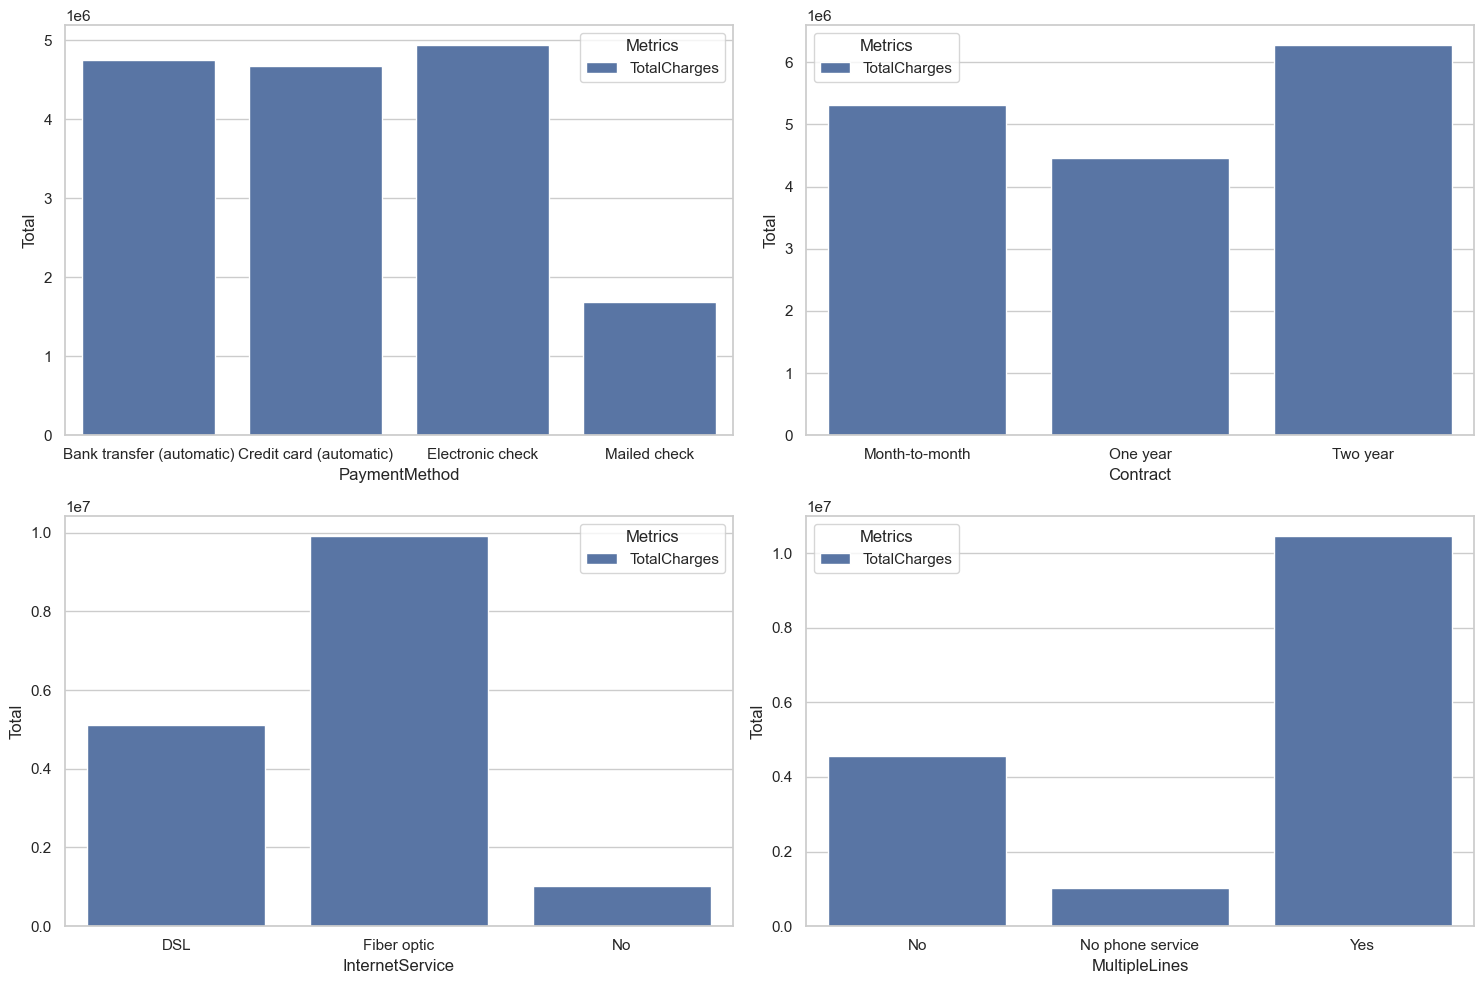

In [18]:
# revenue generation by each important columns


fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

grp = df.groupby("PaymentMethod")[['TotalCharges']].sum().reset_index()
grp = pd.melt(grp, id_vars="PaymentMethod", var_name='Metrics', value_name='Total' )
sns.barplot(data=grp, x="PaymentMethod", hue="Metrics", y="Total", ax=axs[0,0])

grp = df.groupby("Contract")[['TotalCharges']].sum().reset_index()
grp = pd.melt(grp, id_vars="Contract", var_name='Metrics', value_name='Total' )
sns.barplot(data=grp, x="Contract", hue="Metrics", y="Total", ax=axs[0,1])

grp = df.groupby("MultipleLines")[['TotalCharges']].sum().reset_index()
grp = pd.melt(grp, id_vars="MultipleLines", var_name='Metrics', value_name='Total' )
sns.barplot(data=grp, x="MultipleLines", hue="Metrics", y="Total", ax=axs[1,1])

grp = df.groupby("InternetService")[['TotalCharges']].sum().reset_index()
grp = pd.melt(grp, id_vars="InternetService", var_name='Metrics', value_name='Total' )
sns.barplot(data=grp, x="InternetService", hue="Metrics", y="Total", ax=axs[1,0])

plt.tight_layout()
plt.show();

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Feature engineering

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

#looping for columns
for c in df.columns[1:]:
    if (df[c].dtype == 'object'):
        df[c]=encoder.fit_transform(df[c])
    else:
        df[c]=df[c]
        
df.head()
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [229]:
df1 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

label = df[['Churn']]

label.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# Machine learning 

In [234]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df1,label, test_size=0.2, random_state=15)

In [176]:
y_test.head()

,Churn
2797,1
5128,0
5484,0
3979,0
4641,0


#### Model Building

In [235]:
#Classifier Liberies
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Evalution Metrics
from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

#logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Accuracy")
print("Accuracy:", accuracy_score(y_test,ly_pred))
print("precision:", precision_score(y_test,ly_pred))
print("Recall:", recall_score(y_test,ly_pred))
print("F1-SCORE:", f1_score(y_test,ly_pred))
print("AUC-ROC:", roc_auc_score(y_test,ly_pred))

Logistic Accuracy
Accuracy: 0.8123667377398721
precision: 0.6677524429967426
Recall: 0.55858310626703
F1-SCORE: 0.6083086053412463
AUC-ROC: 0.7302530915950535


In [225]:
#machine learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
             [RandomForestClassifier(), 'Random Forest'],
             [SGDClassifier(), 'SGD Classifier'],
             [SVC(),'SVC'],
             [GaussianNB(), 'Naive Bayes'],
             [DecisionTreeClassifier(random_state= 15),"Decision Tree"],
             [LogisticRegression(), 'Logistic Regression']
             ]

In [236]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [237]:
print('Accuracy_list')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy_list


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,79.46%,79.74%,73.85%,73.92%,74.34%,71.71%,81.24%


In [238]:
print ('Precision_list')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision_list


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,63.09%,63.58%,49.9%,0.0%,50.59%,46.15%,66.78%


In [239]:
print ('recall_list')
s2 = pd.DataFrame(recall_list)
s2.head()

recall_list


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,51.23%,52.32%,67.85%,0.0%,70.57%,50.68%,55.86%


In [241]:
print ('roc_list')
s2 = pd.DataFrame(roc_list)
s2.head()

roc_list


,XGB Classifier,Random Forest,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,70.32%,70.87%,71.9%,50.0%,73.12%,64.91%,73.03%
